This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/master?urlpath=lab/tree/notebooks/5_classification/N1_classification_LDA_QDA.ipynb)

# Classification 
In this notebook, the classification with LDA and QDA is illustrated on the Digits data set.

In [2]:
 from sklearn.datasets import load_digits
# Load digits
X, y = load_digits(return_X_y=True)
print(X.shape)
print(X.max())

(1797, 64)
16.0


The data set is made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16 (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

We can visualize the data by reshaping correctly each sample:

Text(0.5, 1.0, 'Label = 4')

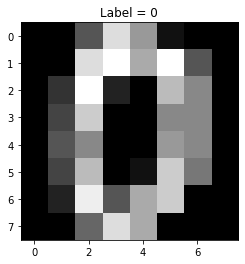

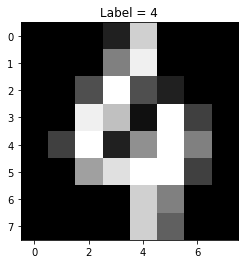

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the first element
plt.figure()
plt.imshow(X[0,:].reshape(8,8),cmap="gray")
plt.title("Label = {}".format(y[0]))

# Plot the hundredth element
plt.figure()
plt.imshow(X[100,:].reshape(8,8),cmap="gray")
plt.title("Label = {}".format(y[100]))

To perform the classification and the validation of the model, we should split our data sets into two disjoint parts. The classification accuracy is assessed using the global accuracy, which is 1 minus the misclassification rate.

In [4]:
# remove sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA,\
                                        QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as OA

# Split the data -> test_size=0.40 means we keep 60% of the data for training and 40% for validation
# The stratification ensures that the proportion of each class from the orginal data is preserved in 
# the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

models = [LDA(), QDA()]
names = ["LDA", "QDA"]

for name, model in zip(names,models):
    # train the model
    model.fit(X_train, y_train)
    # Compute the overall accuracy on the validation set
    y_pred = model.predict(X_test)
    oa = OA(y_test, y_pred)
    print("{} misclassification rate = {}".format(name,1.-oa))


LDA misclassification rate = 0.04867872044506261
QDA misclassification rate = 0.11404728789986096


# Setting up hyperparameters
Both LDA and QDA have hyperparameters, which are related to the estimation of the covariance matrices. They usually have significant influences on the final classification results. 

For instance, QDA implemented in Sklearn has a regulation parameter $\lambda$ that controls the condition number of the class covariance matrix: 
$$(1-\lambda) \Sigma + \lambda I_p $$ 
The following code shows the influence of this hyperparameter on the overall accuracy.

In [11]:
import scipy as sp
reg_param = sp.linspace(0,1)
print(reg_param)
LDA?

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


Init signature:
LDA(
    solver='svd',
    shrinkage=None,
    priors=None,
    n_components=None,
    store_covariance=False,
    tol=0.0001,
)
Docstring:     
Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class
conditional densities to the data and using Bayes' rule.

The model fits a Gaussian density to each class, assuming that all classes
share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input
by projecting it to the most discriminative directions.

.. versionadded:: 0.17
   *LinearDiscriminantAnalysis*.

Read more in the :ref:`User Guide <lda_qda>`.

Parameters
----------
solver : string, optional
    Solver to use, possible values:
      - 'svd': Singular value decomposition (default).
        Does not compute the covariance matrix, therefore this solver is
        recommended for data with a large number of features.
      - 'lsqr': Least squares solution, can be combined w

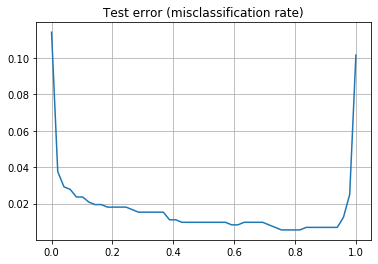

In [17]:
import numpy as np

oa = []
for reg_param_ in reg_param:
    model = QDA(reg_param=reg_param_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    oa.append(OA(y_test, y_pred))
plt.plot(reg_param, 1.-np.asarray(oa))
plt.title("Test error (misclassification rate)")
plt.grid()

In [18]:
print("Best hyperparameters value: {}".format(reg_param[sp.argmax(oa)]))
print("Best test error: {}".format(1.-oa[sp.argmax(oa)]))

Best hyperparameters value: 0.7551020408163265
Best test error: 0.0055632823365785455


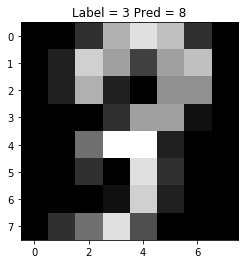

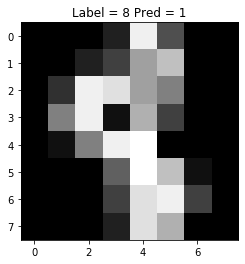

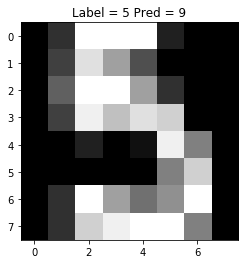

In [8]:
# Display some Error cases

model = QDA(reg_param=reg_param[sp.argmax(oa)])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

t = sp.where(y_pred!=y_test)[0]

for t_ in t[1:10]:
    plt.figure()
    plt.imshow(X_test[t_,:].reshape(8,8),cmap="gray")
    plt.title("Label = {} Pred = {}".format(y_test[t_],y_pred[t_]))

### Exercice:
 - Is it necessary to regularize only a little or a lot the class covariance matrix to get the best performance? How can this be explained?
 - What happens in the limiting case where $\lambda=0$ and $\lambda=1$?  What's the name we give in machine learning for each of these issues? 
 - Do the same analysis for LDA with regularization (`shrinkage` parameter + compatible `solver`, see the sklearn api): compare and comment the results